In [1]:
import pandas as pd
import datetime

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())
path = '/home/jongsky/anaconda3/envs/python_3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

설정 파일 위치:  /home/jongsky/anaconda3/envs/python_3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
NanumGothic Eco


## 기존데이터 불러오기

In [4]:
all_df = pd.read_csv('../../../data/데이터정리/전체데이터.csv')
remover_df = pd.read_csv('../../../data/데이터정리/미완성_투입자재.csv')

In [5]:
all_df['날짜'] = all_df['날짜'].map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date())
remover_df['날짜'] = remover_df['날짜'].map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date())

In [6]:
# remover_df_select = remover_df[(datetime.date(2017, 1, 1)<=remover_df['날짜'])&(remover_df['날짜']<=datetime.date(2018, 12, 31))]

In [7]:
all_df.head()

,날짜,년,월,일,시,구이름,기온(°C),강수량(mm),날씨,날씨_리스트,강설량_체크,계산된적설량(cm),교통사고수,차량통행속도,교통량
0,2017-01-01,2017,1,1,0,강남구,1.7,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,0.0,36.298658,1708.4
1,2017-01-01,2017,1,1,1,강남구,1.4,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,0.0,34.514040,1815.7
2,2017-01-01,2017,1,1,2,강남구,1.2,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,1.0,35.041178,1104.1
3,2017-01-01,2017,1,1,3,강남구,0.5,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,2.0,37.128855,844.3
4,2017-01-01,2017,1,1,4,강남구,0.6,0.0,구름많음/안개,"['구름많음', '안개']",False,0.0,1.0,38.630438,759.3


In [8]:
remover_df.head()

,날짜,년,월,일,시간,구이름,재설자재,투입자재량,비고
0,2011-02-26,2011,2,26,2200,도봉구,염화칼슘,0.0,NaN
1,2011-02-26,2011,2,26,2200,도봉구,소금,0.0,NaN
2,2011-02-26,2011,2,26,2200,도봉구,모래,0.0,NaN
3,2011-02-26,2011,2,26,2200,도봉구,염화마그네슘,0.0,NaN
4,2011-02-26,2011,2,26,2200,도봉구,환경인증(고상),0.0,NaN


## 데이터전처리
- 데이터 정리 파일에서 전체데이터와 미완성_투입자재를 합치고
- 권역별 데이터를 이용하여 구이름을 권역별로 변경

In [9]:
data_df = pd.merge(all_df, remover_df, on=['날짜','구이름'])[['날짜', '시', '구이름','기온(°C)','계산된적설량(cm)','시간', '재설자재', '투입자재량', '비고']]

In [10]:
data_df.head()

,날짜,시,구이름,기온(°C),계산된적설량(cm),시간,재설자재,투입자재량,비고
0,2017-01-11,0,강남구,-5.3,0.0,2300,염화칼슘,0.0,NaN
1,2017-01-11,0,강남구,-5.3,0.0,2300,소금,20.0,NaN
2,2017-01-11,0,강남구,-5.3,0.0,2300,모래,0.0,NaN
3,2017-01-11,0,강남구,-5.3,0.0,2300,환경인증(고상),0.0,NaN
4,2017-01-11,0,강남구,-5.3,0.0,2300,염화칼슘수용액,0.0,NaN


In [11]:
change_zone = {
    "서북권": ['마포구','서대문구','은평구'],
    "서남권": ['강서구','관악구','구로구','금천구','동작구','양천구','영등포구'],
    "동남권": ['강남구','강동구','서초구','송파구'],
    "동북권": ['강북구','광진구','노원구','도봉구','동대문구','성동구','성북구','중랑구'],
    "도심권": ['용산구','종로구','중구']
}

In [12]:
zone_list = []
for 구이름 in data_df['구이름']:
    for zone, name_list in change_zone.items():
        for name in name_list:
            if name == 구이름:
                zone_list.append(zone)

In [13]:
data_df['권역'] = zone_list

In [14]:
data_df.head()

,날짜,시,구이름,기온(°C),계산된적설량(cm),시간,재설자재,투입자재량,비고,권역
0,2017-01-11,0,강남구,-5.3,0.0,2300,염화칼슘,0.0,NaN,동남권
1,2017-01-11,0,강남구,-5.3,0.0,2300,소금,20.0,NaN,동남권
2,2017-01-11,0,강남구,-5.3,0.0,2300,모래,0.0,NaN,동남권
3,2017-01-11,0,강남구,-5.3,0.0,2300,환경인증(고상),0.0,NaN,동남권
4,2017-01-11,0,강남구,-5.3,0.0,2300,염화칼슘수용액,0.0,NaN,동남권


In [15]:
data_df['계산된적설량(cm)'].unique()

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3.5, nan, 3. ])

In [16]:
data_df_1 = data_df[data_df['계산된적설량(cm)']==1]
data_df_2 = data_df[data_df['계산된적설량(cm)']==2]
data_df_3 = data_df[data_df['계산된적설량(cm)']==3]

data_df_0_1 = data_df[(data_df['계산된적설량(cm)']>=0)&(data_df['계산된적설량(cm)']<1)]
data_df_1_2 = data_df[(data_df['계산된적설량(cm)']>=1)&(data_df['계산된적설량(cm)']<2)]
data_df_2_ = data_df[(data_df['계산된적설량(cm)']>=2)]

## 적설량이 1cm일 때

- 재설자재를 가장 많이 사용한 소금, 염화칼슘으로 구별 분석

In [17]:
data_df_1.groupby(['재설자재']).sum()

,시,기온(°C),계산된적설량(cm),시간,투입자재량,비고
재설자재,,,,,,
모래,2729,210.0,174.0,115560,0.0,0.0
소금,2729,210.0,174.0,115560,3743.0,0.0
염화칼슘,2729,210.0,174.0,115560,1966.0,0.0
염화칼슘수용액,2729,210.0,174.0,115560,105.0,0.0
자재계,2729,210.0,174.0,115560,6517.0,0.0
환경인증(고상),2729,210.0,174.0,115560,624.0,0.0
환경인증(액상),2729,210.0,174.0,115560,184.0,0.0


In [18]:
data_df_1 = data_df_1[(data_df_1['재설자재']=='소금')|(data_df_1['재설자재']=='염화칼슘')]

In [19]:
data_df_1 = data_df_1.groupby(['권역','재설자재'])['기온(°C)','계산된적설량(cm)','투입자재량'].mean()
data_df_1

기온(°C)  계산된적설량(cm)      투입자재량
권역  재설자재                                 
도심권 소금    0.792857         1.0  21.642857
    염화칼슘  0.792857         1.0   6.785714
동남권 소금    1.155556         1.0  40.333333
    염화칼슘  1.155556         1.0  20.500000
동북권 소금    1.143902         1.0  14.853659
    염화칼슘  1.143902         1.0  15.560976
서남권 소금    1.427869         1.0  15.901639
    염화칼슘  1.427869         1.0   2.868852
서북권 소금    1.059091         1.0  18.590909
    염화칼슘  1.059091         1.0  14.545455

In [20]:
data_df_1 = data_df_1.reset_index()
data_df_1_소금 = data_df_1[data_df_1['재설자재']=='소금']
data_df_1_염화칼슘 = data_df_1[data_df_1['재설자재']=='염화칼슘']

In [21]:
data_df_1_소금

,권역,재설자재,기온(°C),계산된적설량(cm),투입자재량
0,도심권,소금,0.792857,1.0,21.642857
2,동남권,소금,1.155556,1.0,40.333333
4,동북권,소금,1.143902,1.0,14.853659
6,서남권,소금,1.427869,1.0,15.901639
8,서북권,소금,1.059091,1.0,18.590909


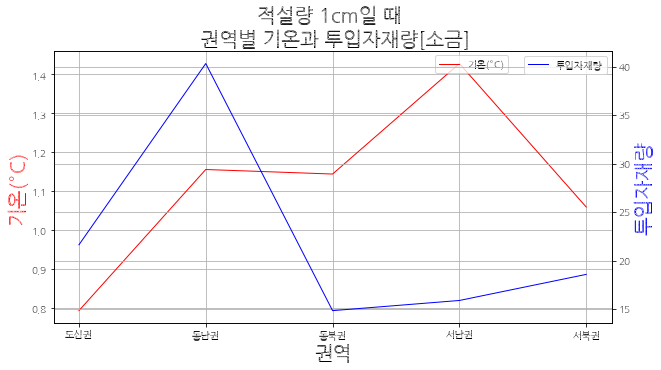

In [23]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_1_소금, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_1_소금, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 1cm일 때 \n 권역별 기온과 투입자재량[소금]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/적설량_1cm_소금_graph.png')

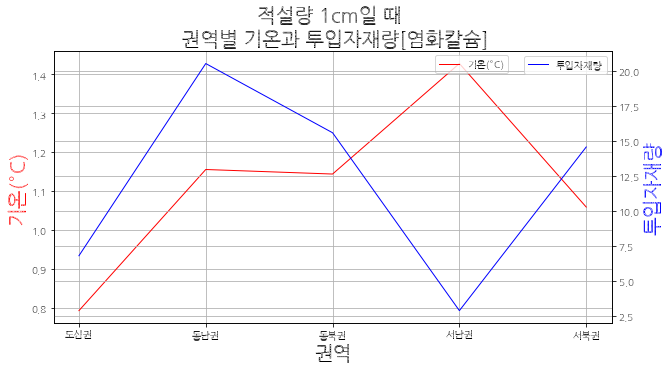

In [24]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_1_염화칼슘, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_1_염화칼슘, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 1cm일 때 \n 권역별 기온과 투입자재량[염화칼슘]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/적설량_1cm_염화칼슘_graph.png')

## 적설량이 2cm일 때

- 재설자재를 가장 많이 사용한 소금, 염화칼슘으로 구별 분석

In [25]:
data_df_2.groupby(['재설자재']).sum()

,시,기온(°C),계산된적설량(cm),시간,투입자재량,비고
재설자재,,,,,,
모래,312,10.7,50.0,26590,0.0,0.0
소금,312,10.7,50.0,26590,1073.0,0.0
염화칼슘,312,10.7,50.0,26590,689.0,0.0
염화칼슘수용액,312,10.7,50.0,26590,16.0,0.0
자재계,312,10.7,50.0,26590,1908.0,0.0
환경인증(고상),312,10.7,50.0,26590,44.0,0.0
환경인증(액상),312,10.7,50.0,26590,102.0,0.0


In [26]:
data_df_2 = data_df_2[(data_df_2['재설자재']=='소금')|(data_df_2['재설자재']=='염화칼슘')]

In [27]:
data_df_2 = data_df_2.groupby(['권역','재설자재'])['기온(°C)','계산된적설량(cm)','투입자재량'].mean()
data_df_2

기온(°C)  계산된적설량(cm)      투입자재량
권역  재설자재                                 
도심권 소금   -0.240000         2.0  33.600000
    염화칼슘 -0.240000         2.0   8.000000
동남권 소금   -0.300000         2.0  69.750000
    염화칼슘 -0.300000         2.0  66.750000
동북권 소금    0.516667         2.0  58.833333
    염화칼슘  0.516667         2.0  54.833333
서남권 소금    1.314286         2.0  27.571429
    염화칼슘  1.314286         2.0   7.285714
서북권 소금    0.266667         2.0  26.666667
    염화칼슘  0.266667         2.0   0.666667

In [28]:
data_df_2 = data_df_2.reset_index()
data_df_2_소금 = data_df_2[data_df_2['재설자재']=='소금']
data_df_2_염화칼슘 = data_df_2[data_df_2['재설자재']=='염화칼슘']

In [29]:
data_df_2_소금

,권역,재설자재,기온(°C),계산된적설량(cm),투입자재량
0,도심권,소금,-0.240000,2.0,33.600000
2,동남권,소금,-0.300000,2.0,69.750000
4,동북권,소금,0.516667,2.0,58.833333
6,서남권,소금,1.314286,2.0,27.571429
8,서북권,소금,0.266667,2.0,26.666667


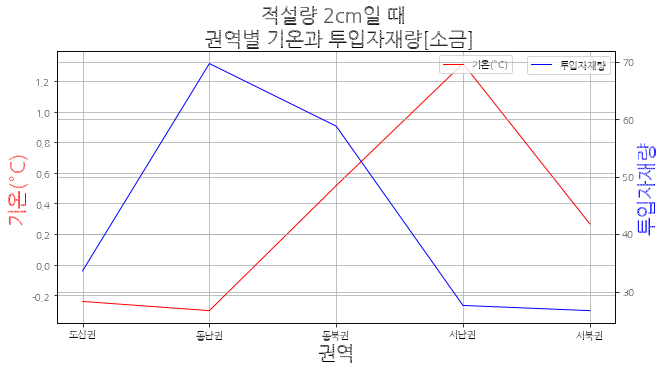

In [30]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_2_소금, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_2_소금, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 2cm일 때 \n 권역별 기온과 투입자재량[소금]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/적설량_2cm_소금_graph.png')

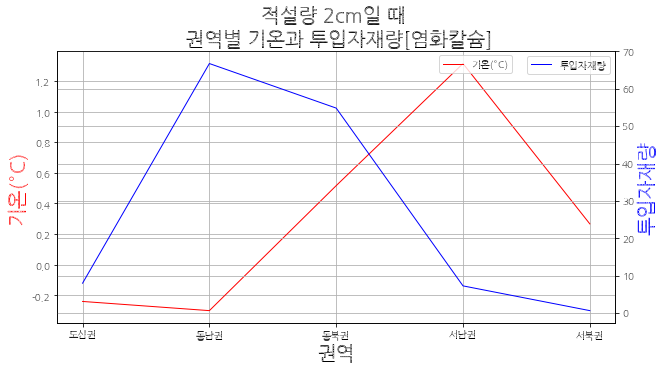

In [31]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_2_염화칼슘, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_2_염화칼슘, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 2cm일 때 \n 권역별 기온과 투입자재량[염화칼슘]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/적설량_2cm_염화칼슘_graph.png')

## 적설량이 3cm일 때 - 노원구밖에 없음으로 생략

- 재설자재를 가장 많이 사용한 환경인증(고상), 소금, 염화칼슘으로 구별 분석

In [32]:
data_df_3

,날짜,시,구이름,기온(°C),계산된적설량(cm),시간,재설자재,투입자재량,비고,권역
59689,2017-12-10,7,노원구,-1.3,3.0,710,염화칼슘,15.0,NaN,동북권
59690,2017-12-10,7,노원구,-1.3,3.0,710,소금,30.0,NaN,동북권
59691,2017-12-10,7,노원구,-1.3,3.0,710,모래,0.0,NaN,동북권
59692,2017-12-10,7,노원구,-1.3,3.0,710,환경인증(고상),55.0,NaN,동북권
59693,2017-12-10,7,노원구,-1.3,3.0,710,염화칼슘수용액,0.0,NaN,동북권
59694,2017-12-10,7,노원구,-1.3,3.0,710,환경인증(액상),0.0,NaN,동북권
59695,2017-12-10,7,노원구,-1.3,3.0,710,자재계,100.0,NaN,동북권


## 적설량이 0cm~1cm미만 일 때

- 재설자재를 가장 많이 사용한 소금, 염화칼슘 으로 구별 분석

In [33]:
data_df_0_1.groupby(['재설자재']).sum()

,시,기온(°C),계산된적설량(cm),시간,투입자재량,비고
재설자재,,,,,,
모래,281805,-26400.8,340.0,34522130,744.0,0.0
소금,281805,-26400.8,340.0,34522130,470531.0,0.0
염화칼슘,281805,-26400.8,340.0,34522130,301925.0,0.0
염화칼슘수용액,281805,-26400.8,340.0,34522130,22316.0,0.0
자재계,281805,-26400.8,340.0,34522130,913683.0,0.0
환경인증(고상),281805,-26400.8,340.0,34522130,109387.0,0.0
환경인증(액상),281805,-26400.8,340.0,34522130,31840.0,0.0


In [34]:
data_df_0_1 = data_df_0_1[(data_df_0_1['재설자재']=='소금')|(data_df_0_1['재설자재']=='염화칼슘')]

In [35]:
data_df_0_1 = data_df_0_1.groupby(['권역','재설자재'])['기온(°C)','계산된적설량(cm)','투입자재량'].mean()
data_df_0_1

기온(°C)  계산된적설량(cm)      투입자재량
권역  재설자재                                 
도심권 소금   -1.969324    0.013692  29.946620
    염화칼슘 -1.969324    0.013692   7.897973
동남권 소금   -0.511485    0.011938  28.279899
    염화칼슘 -0.511485    0.011938  18.297311
동북권 소금   -0.973890    0.013859  15.854037
    염화칼슘 -0.973890    0.013859  14.225175
서남권 소금   -0.874157    0.014962  16.044608
    염화칼슘 -0.874157    0.014962   7.729320
서북권 소금   -1.685985    0.013536  12.336717
    염화칼슘 -1.685985    0.013536  13.906599

In [36]:
data_df_0_1 = data_df_0_1.reset_index()
data_df_0_1_소금 = data_df_0_1[data_df_0_1['재설자재']=='소금']
data_df_0_1_염화칼슘 = data_df_0_1[data_df_0_1['재설자재']=='염화칼슘']

In [37]:
data_df_0_1_소금

,권역,재설자재,기온(°C),계산된적설량(cm),투입자재량
0,도심권,소금,-1.969324,0.013692,29.946620
2,동남권,소금,-0.511485,0.011938,28.279899
4,동북권,소금,-0.973890,0.013859,15.854037
6,서남권,소금,-0.874157,0.014962,16.044608
8,서북권,소금,-1.685985,0.013536,12.336717


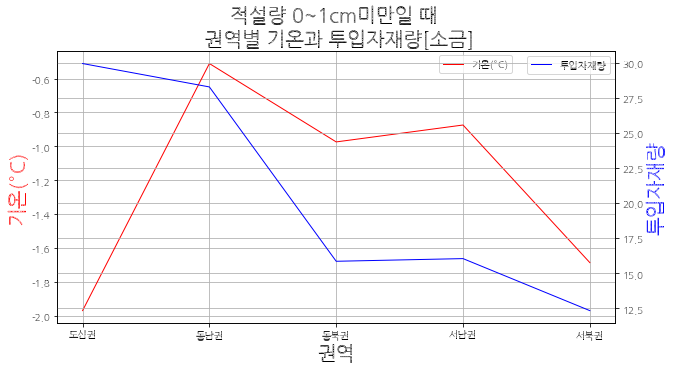

In [38]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_0_1_소금, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_0_1_소금, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 0~1cm미만일 때 \n 권역별 기온과 투입자재량[소금]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/0~1cm미만_소금_graph.png')

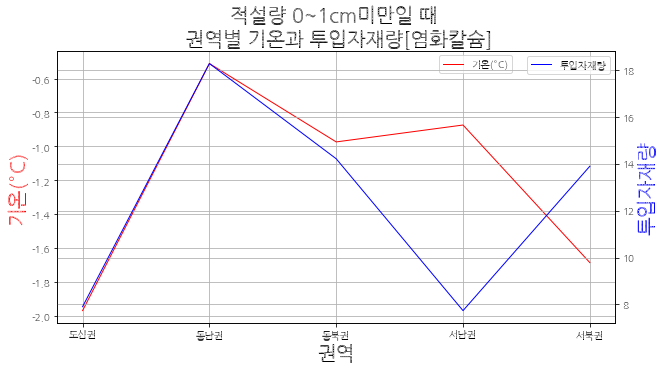

In [39]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_0_1_염화칼슘, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_0_1_염화칼슘, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 0~1cm미만일 때 \n 권역별 기온과 투입자재량[염화칼슘]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/0~1cm미만_염화칼슘_graph.png')

## 적설량이 1cm~2cm미만 일 때

- 재설자재를 가장 많이 사용한 소금, 염화칼슘 으로 구별 분석

In [40]:
data_df_1_2.groupby(['재설자재']).sum()

,시,기온(°C),계산된적설량(cm),시간,투입자재량,비고
재설자재,,,,,,
모래,3388,257.3,247.5,162200,0.0,0.0
소금,3388,257.3,247.5,162200,5181.0,0.0
염화칼슘,3388,257.3,247.5,162200,2625.0,0.0
염화칼슘수용액,3388,257.3,247.5,162200,140.0,0.0
자재계,3388,257.3,247.5,162200,9143.0,0.0
환경인증(고상),3388,257.3,247.5,162200,939.0,0.0
환경인증(액상),3388,257.3,247.5,162200,398.0,0.0


In [41]:
data_df_1_2 = data_df_1_2[(data_df_1_2['재설자재']=='소금')|(data_df_1_2['재설자재']=='염화칼슘')]

In [42]:
data_df_1_2 = data_df_1_2.groupby(['권역','재설자재'])['기온(°C)','계산된적설량(cm)','투입자재량'].mean()
data_df_1_2

기온(°C)  계산된적설량(cm)      투입자재량
권역  재설자재                                 
도심권 소금    0.615789    1.131579  31.631579
    염화칼슘  0.615789    1.131579   7.894737
동남권 소금    1.185106    1.117021  39.148936
    염화칼슘  1.185106    1.117021  20.510638
동북권 소금    1.079661    1.152542  15.661017
    염화칼슘  1.079661    1.152542  15.966102
서남권 소금    1.388889    1.076389  16.930556
    염화칼슘  1.388889    1.076389   3.097222
서북권 소금    1.007692    1.076923  22.961538
    염화칼슘  1.007692    1.076923  13.307692

In [43]:
data_df_1_2 = data_df_1_2.reset_index()
data_df_1_2_소금 = data_df_1_2[data_df_1_2['재설자재']=='소금']
data_df_1_2_염화칼슘 = data_df_1_2[data_df_1_2['재설자재']=='염화칼슘']

In [44]:
data_df_1_2_소금

,권역,재설자재,기온(°C),계산된적설량(cm),투입자재량
0,도심권,소금,0.615789,1.131579,31.631579
2,동남권,소금,1.185106,1.117021,39.148936
4,동북권,소금,1.079661,1.152542,15.661017
6,서남권,소금,1.388889,1.076389,16.930556
8,서북권,소금,1.007692,1.076923,22.961538


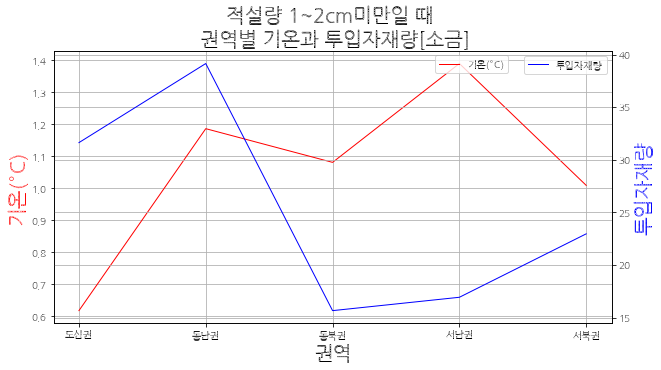

In [45]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_1_2_소금, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_1_2_소금, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 1~2cm미만일 때 \n 권역별 기온과 투입자재량[소금]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/1~2cm미만_소금_graph.png')

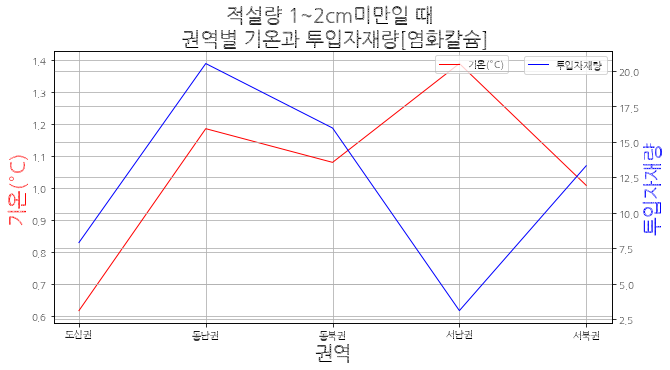

In [46]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_1_2_염화칼슘, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_1_2_염화칼슘, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 1~2cm미만일 때 \n 권역별 기온과 투입자재량[염화칼슘]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/1~2cm미만_염화칼슘_graph.png')

## 적설량이 2cm이상 일 때

- 재설자재를 가장 많이 사용한 소금, 염화칼슘 으로 구별 분석

In [47]:
data_df_2_.groupby(['재설자재']).sum()

,시,기온(°C),계산된적설량(cm),시간,투입자재량,비고
재설자재,,,,,,
모래,441,12.6,79.0,37830,0.0,0.0
소금,441,12.6,79.0,37830,1325.0,0.0
염화칼슘,441,12.6,79.0,37830,1025.0,0.0
염화칼슘수용액,441,12.6,79.0,37830,49.0,0.0
자재계,441,12.6,79.0,37830,2665.0,0.0
환경인증(고상),441,12.6,79.0,37830,193.0,0.0
환경인증(액상),441,12.6,79.0,37830,122.0,0.0


In [48]:
data_df_2_ = data_df_2_[(data_df_2_['재설자재']=='소금')|(data_df_2_['재설자재']=='염화칼슘')]

In [49]:
data_df_2_ = data_df_2_.groupby(['권역','재설자재'])['기온(°C)','계산된적설량(cm)','투입자재량'].mean()
data_df_2_

기온(°C)  계산된적설량(cm)      투입자재량
권역  재설자재                                 
도심권 소금   -0.240000    2.000000  33.600000
    염화칼슘 -0.240000    2.000000   8.000000
동남권 소금    0.316667    2.166667  52.166667
    염화칼슘  0.316667    2.166667  49.166667
동북권 소금    0.145455    2.363636  44.000000
    염화칼슘  0.145455    2.363636  51.636364
서남권 소금    1.000000    2.150000  25.600000
    염화칼슘  1.000000    2.150000   7.800000
서북권 소금    0.075000    2.125000  26.000000
    염화칼슘  0.075000    2.125000  11.000000

In [50]:
data_df_2_ = data_df_2_.reset_index()
data_df_2__소금 = data_df_2_[data_df_2_['재설자재']=='소금']
data_df_2__염화칼슘 = data_df_2_[data_df_2_['재설자재']=='염화칼슘']

In [51]:
data_df_2__소금

,권역,재설자재,기온(°C),계산된적설량(cm),투입자재량
0,도심권,소금,-0.240000,2.000000,33.600000
2,동남권,소금,0.316667,2.166667,52.166667
4,동북권,소금,0.145455,2.363636,44.000000
6,서남권,소금,1.000000,2.150000,25.600000
8,서북권,소금,0.075000,2.125000,26.000000


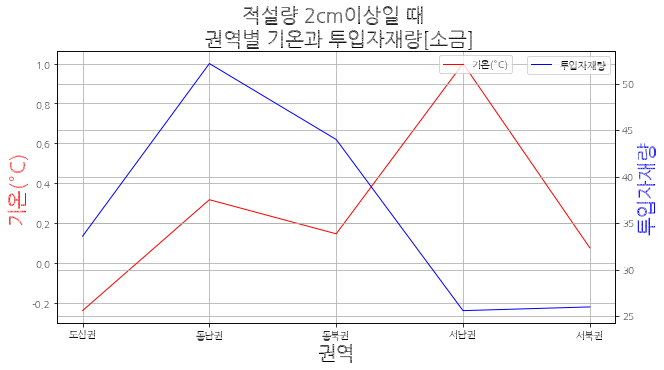

In [52]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_2__소금, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_2__소금, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 2cm이상일 때 \n 권역별 기온과 투입자재량[소금]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/2cm이상_소금_graph.png')

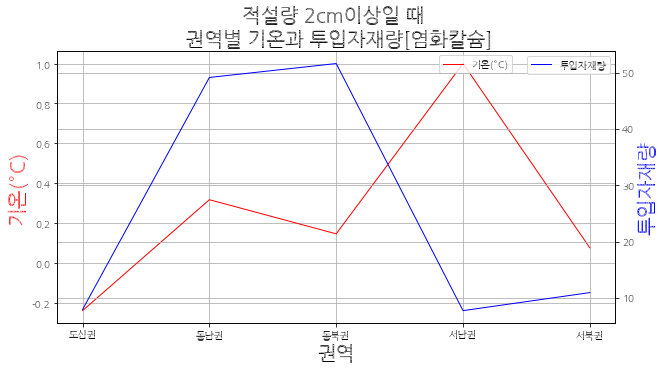

In [53]:
ax = sns.lineplot(x="권역", y="기온(°C)", data=data_df_2__염화칼슘, color='r', ci='sd',label='기온(°C)')
ax2 = ax.twinx()
sns.lineplot(x="권역", y="투입자재량", data=data_df_2__염화칼슘, color='b', ci='sd',label='투입자재량')
# ax.figure.legend()

ax.grid(True)
ax2.grid(True)

plt.title("적설량 2cm이상일 때 \n 권역별 기온과 투입자재량[염화칼슘]", fontsize=20,color='black')

ax.set_xlabel('권역', fontsize=20, color='black')

ax.set_ylabel("기온(°C)",fontsize=20,color='red')
ax2.set_ylabel("투입자재량",fontsize=20,color='blue')

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 1

ax.legend(loc='lower left', bbox_to_anchor=(0.675,0.9))
ax2.legend()

fig = plt.gcf()
plt.show()
fig.savefig('../result/강설량에_따른_제설제_살포량_차이_권역별/2cm이상_염화칼슘_graph.png')